# BigMart Sales Prediction Project

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df= pd.read_csv("bigdatamart_Train.csv")
test_df = pd.read_csv("bigdatamart_Test.csv")

In [6]:
train_df.shape, test_df.shape

((8523, 12), (5681, 11))

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [7]:
train = train_df.copy()
test = test_df.copy()

In [8]:
print(train.isnull().sum())
print("--------------------------------------------------")
test.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
--------------------------------------------------


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can check whether train and test sets have equal percentage of missing values in the same columns

In [9]:
print(train.isnull().sum()/train.shape[0] *100)
print("--------------------------------------------------")
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
--------------------------------------------------


Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

As we can see we have 2 columns: Item_weight and Outlet_Size with 17% and 28% missing values in both train and test sets

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can easily identify categorical(dtype=object) and numerical columns(dtype=int64, float64) from the train data. We should also check if object datatype is due to column containing actual text or alphanumeric characters. Sometimes, Pandas lables float or int dtype as object as one or two values in the columns are blanks. Python gives the highest priority to  string>float>int. So, one blank is enough to label the whole feature column as object even if its float. So use looops to check or if the data isn't big enough, you can just manually look ove the dataset sample.

In [11]:
train_df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2734,FDY51,12.500,Low Fat,0.081135,Meat,220.0798,OUT046,1997,Small,Tier 1,Supermarket Type1,4848.3556
4577,FDJ09,15.000,Low Fat,0.058725,Snack Foods,43.6744,OUT017,2007,NaN,Tier 2,Supermarket Type1,407.4696
80,FDD58,7.760,Low Fat,0.059352,Snack Foods,101.8700,OUT046,1997,Small,Tier 1,Supermarket Type1,1697.7900
4985,FDT14,10.695,Regular,0.127621,Dairy,119.2440,OUT013,1987,High,Tier 3,Supermarket Type1,3475.4760
7553,FDY20,12.500,Regular,0.081685,Fruits and Vegetables,92.3488,OUT013,1987,High,Tier 3,Supermarket Type1,1177.1344


In [12]:
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2176,NCE55,8.92,Low Fat,0.129928,Household,175.7370,OUT046,1997,Small,Tier 1,Supermarket Type1
2708,NCS17,18.60,Low Fat,0.080501,Health and Hygiene,96.2436,OUT046,1997,Small,Tier 1,Supermarket Type1
3123,FDN58,13.80,Regular,0.057194,Snack Foods,233.6984,OUT017,2007,NaN,Tier 2,Supermarket Type1
1976,FDC40,16.00,Regular,0.065196,Dairy,78.3986,OUT045,2002,NaN,Tier 2,Supermarket Type1
3194,FDK22,9.80,Low Fat,0.026127,Snack Foods,216.3850,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [13]:
catcols = train.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",catcols.shape[1])

numcols_train= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numcols_train.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 5


In [14]:
catcols = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",catcols.shape[1])

numcols_test= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numcols_test.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [15]:
train.describe()            #will show description for all the numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Data cleaning

We had two columns where missing values were required to be imputed: Outlet_Size and Item_Type 

Categorical columns can easily be imputed with mode but with numerical columns its always better to check for outliers or skewness. I there is either of them present in the column, then use median because outliers can greatly deviate the mean of the column. but if the data is symmetric then go for mean.

We'll check Item_weight in both test and train dataset for skewness using distplot.

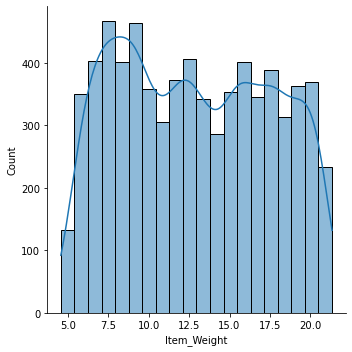

In [17]:
sns.displot(train["Item_Weight"],kde=True)

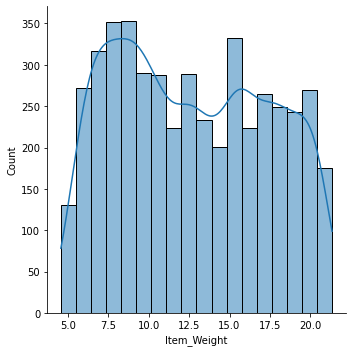

In [18]:
sns.displot(test["Item_Weight"],kde=True)

In [19]:
train["Item_Weight"].skew()

0.0824262091221237

In [20]:
test["Item_Weight"].skew()

0.12997502891537796

Thrid method is to use boxplot to check for outliers. 

<AxesSubplot:xlabel='Item_Weight'>

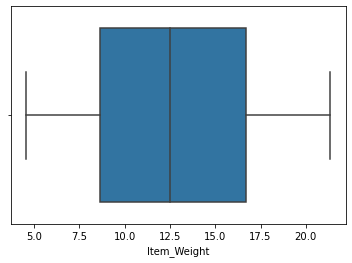

In [21]:
sns.boxplot(test["Item_Weight"])

<AxesSubplot:xlabel='Item_Weight'>

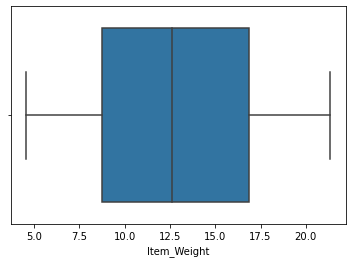

In [22]:
sns.boxplot(train["Item_Weight"])

As we can infer from all three methods above that the numerical column("Item_Weight") is not skewed or contain any outliers, which means we can use mean as imputation for Nan values.

In [23]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [24]:
print(train['Outlet_Size'].value_counts())
print('***---***---***---***---***---')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
***---***---***---***---***---
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


We can impute the categorical column("Outlet_type") with "Medium" as its the most common value or mode

In [25]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [26]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

In [27]:
train['Item_Type'].isnull().sum(),test['Item_Type'].isnull().sum()

(0, 0)

# Preparing data for EDA 

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We can see that there has been some deformity in the feature type while collecting the data. Here, Low fat is the same as LF and low fat and Regular is same as reg

In [32]:
train["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat","Regular"],inplace = True)
test["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat","Regular"],inplace = True)

In [33]:
train.Item_Fat_Content.value_counts(), test.Item_Fat_Content.value_counts()

(Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64)

We can also make the numerical column of "Outlet_Establishment_Year" much more informative by comparing it to the current year, so it'll be easier to articulate how long has the store been running for and easier to do analysis on that. It's usually better to convert dates and years to something in the int64 dtype or comparing it with something so we can make sense of the data in a explicable way. (used kaggle references for this)

In [34]:
train['Established_years'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
test['Established_years'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x)

In [35]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Established_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


# Univariate EDA

In [36]:
catcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Text(0, 0.5, 'Count')

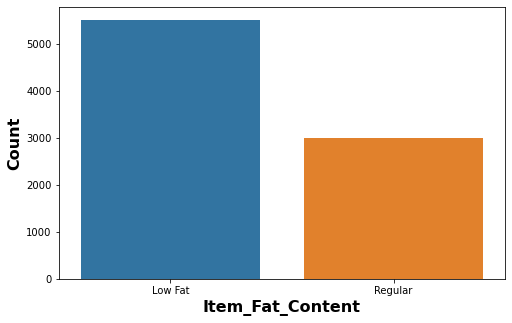

In [37]:
plt.figure(figsize=(8,5))

sns.countplot("Item_Fat_Content", data = train)
plt.xlabel("Item_Fat_Content",fontsize = 16, fontweight = 'bold')
plt.ylabel('Count',fontsize = 16, fontweight = 'bold')

People are interested in buying a healtheir option ("Low Fat")

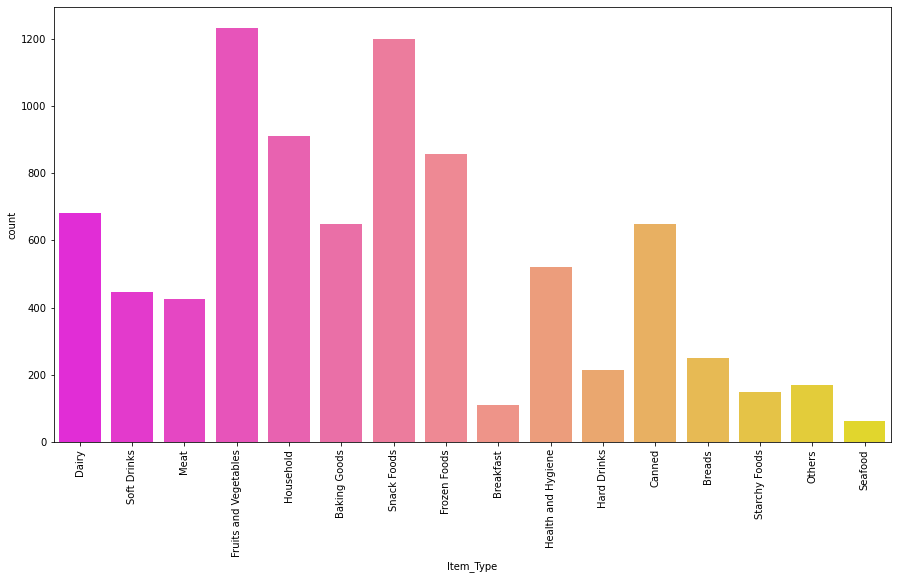

In [38]:
plt.figure(figsize=(15,8))
sns.countplot('Item_Type',data=train,palette='spring')
X = plt.gca().xaxis
for item in X.get_ticklabels():
    item.set_rotation(90)
plt.show()

We can infer from the above graph, Fruits and vegetables and Snack Foods account for the most sales in these outlets. on the thirrd spot is the household items, which points towards that these stores are largely used for grocery and routine shopping. Also, customers don't tend to buy breakfast related itemns and seafood from Bigmart.

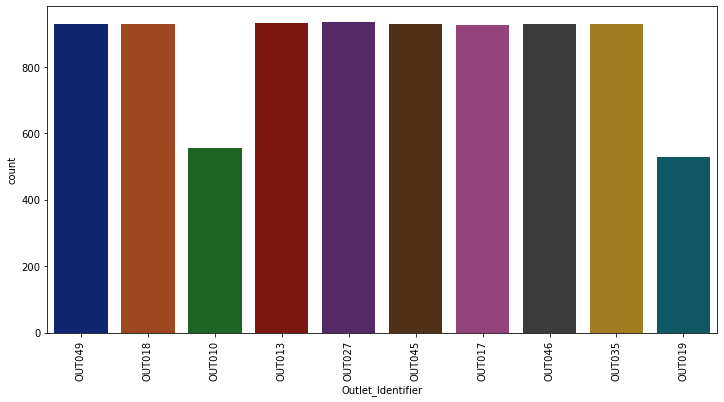

In [39]:
plt.figure(figsize=(12,6))
sns.countplot('Outlet_Identifier',data=train,palette='dark')
X = plt.gca().xaxis
for item in X.get_ticklabels():
    item.set_rotation(90)
plt.show()

In this dataset, Bigmart is operating 10 stores which are almost equal in sales except Outlet 10 and 19 indicating towards the fact that these can be medium or small scale outlets or might be located in low population areas.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

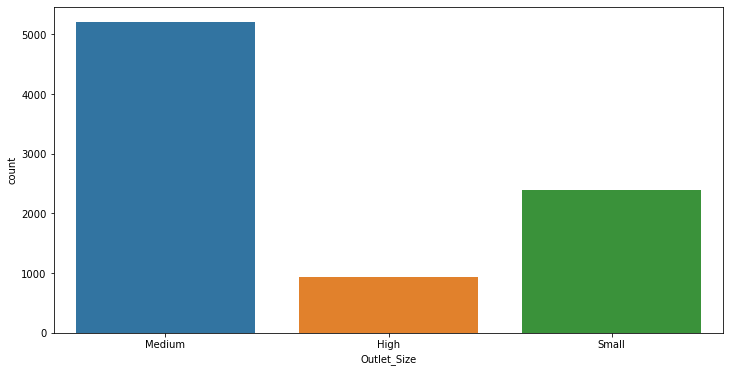

In [40]:
plt.figure(figsize=(12,6))
sns.countplot('Outlet_Size',data=train)

Bigmart majorly operates medium scale outlets, with high scale or supermarkets being the lowest in number. 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

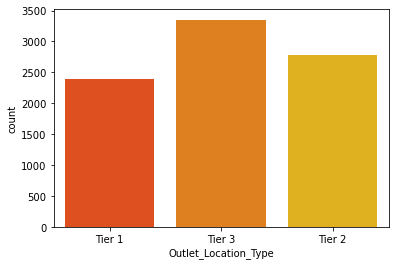

In [41]:
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

Bigmart's business is mainly present in Tier 3 cities, with Tier 2 cities on the second spot.

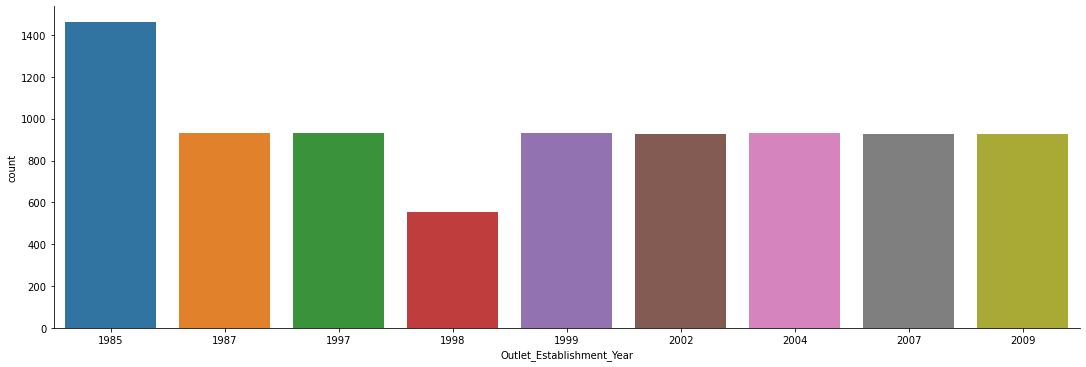

In [42]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =3)

We can see that more stores were established in 1985 than in any other year. Also, it can be noted that Bigmart had no stores opened between 1987 to 1995. 

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

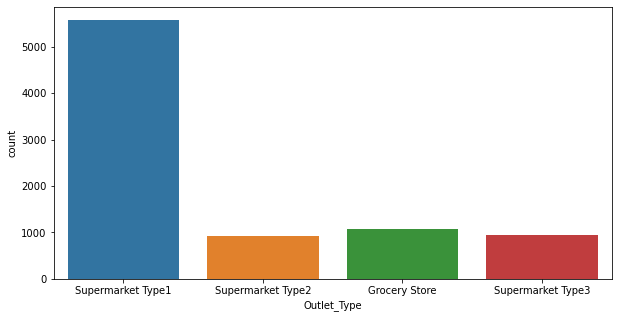

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(train["Outlet_Type"])

Bigmart mostly owns stores which are supermarkets of type I and second major store type are Grocery Stores

# Bivariate EDA

We'll check how the columns impact the target column("Item_Outlet_Sales")

<AxesSubplot:>

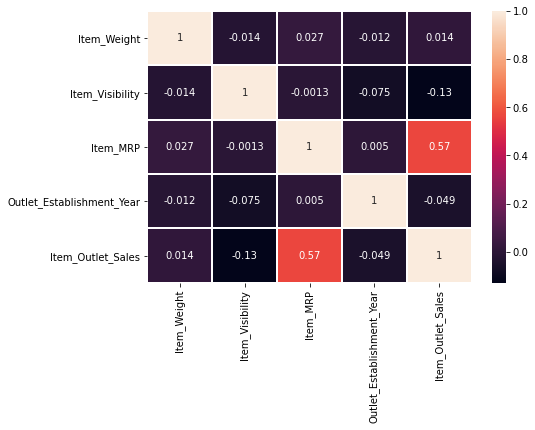

In [44]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numcols_train.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)

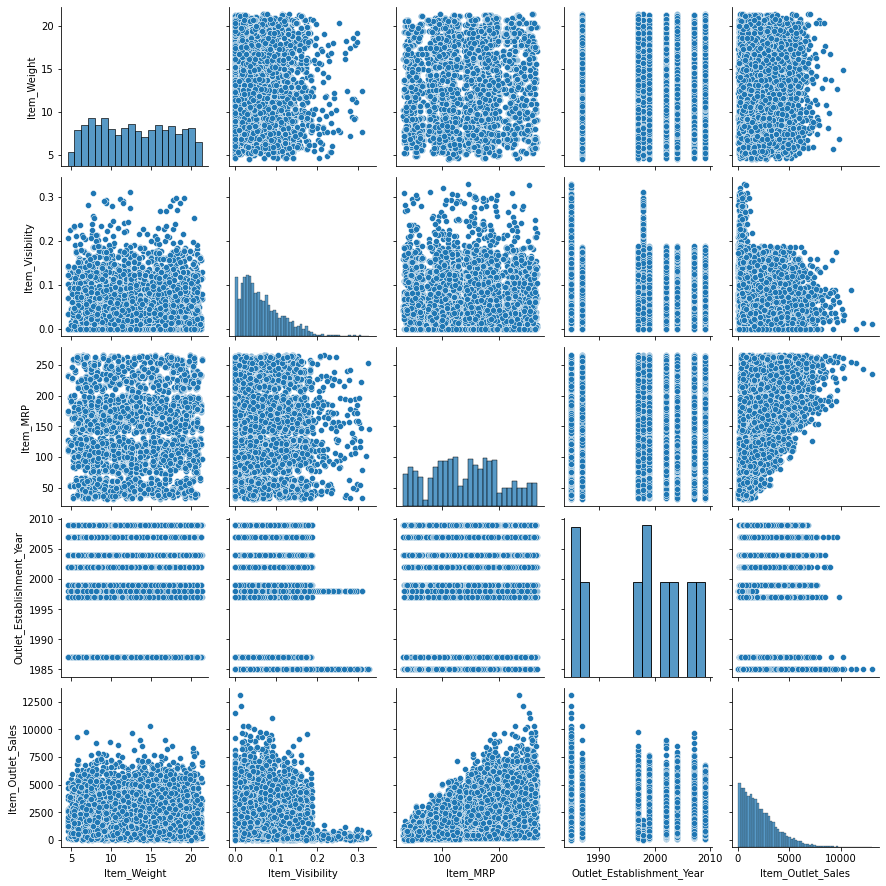

In [45]:
sns.pairplot(numcols_train)

obervations:
1. More Mrp(>180) means More sales
2. Less Visibility means Less sales - even with 0 visibility there are sales which is strange logically.

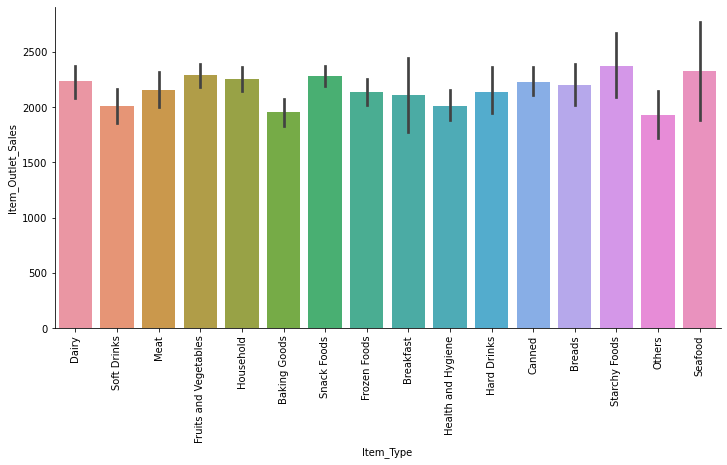

In [46]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'bar',data = train,aspect=2)
X = plt.gca().xaxis
for item in X.get_ticklabels():
    item.set_rotation(90)

We can see from the above graph Starchy Foods and Seafood has the most sales which indicates that even with lower sales than Fruits and Veggies, these are contributing majorly to the sale revenue of BigMart

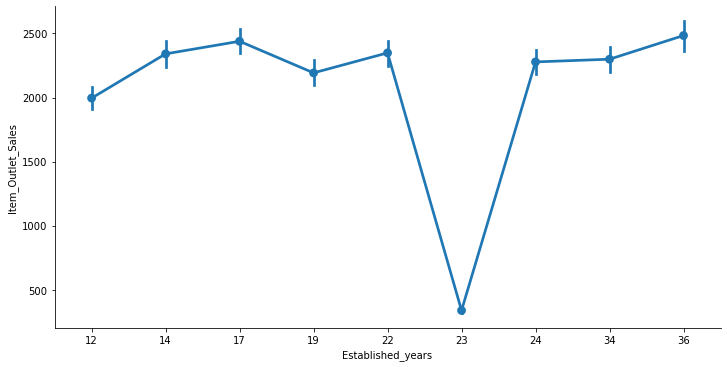

In [47]:
sns.catplot(x = 'Established_years',y = 'Item_Outlet_Sales',kind = 'point',data = train,aspect=2)

We can see that store established 23 years ago is making the least sale revenue relatively but all the other younger and older stores are producing comparable revenues for the company. 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

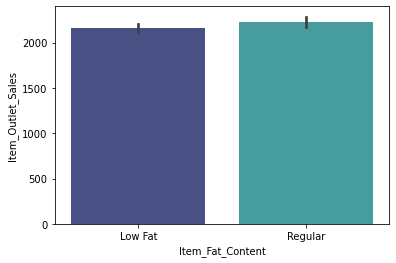

In [48]:
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='mako')

Regular Yougurt brings in more revenue for the Bigmart even though its sales were lower than Low fat.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

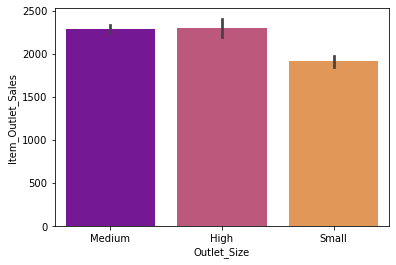

In [49]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='plasma')

Medium and High outlets a providing the most revenue even though company owns the least amount of high scale outlets compared to their medium and small scale outlets

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

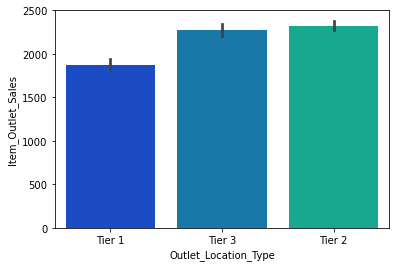

In [50]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='winter')

Tier 2 and 3 city outlets have similar revenue contribution compared to Tier 1 cities which have lesser Bigmart's 

# Multivariate EDA:

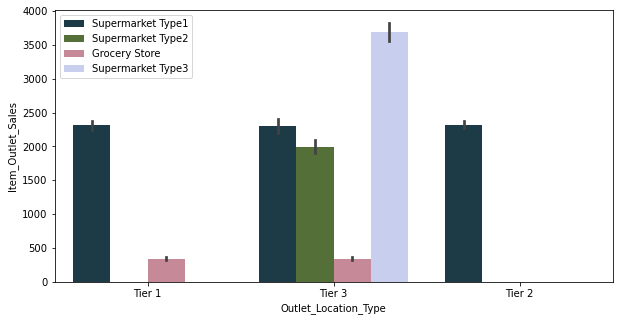

In [51]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='cubehelix')
plt.legend()

We can conclude that only Tier 3 cities have all kinds of outlet Types. Whereas in Tier 2 cities have only supermarket type 1 outlets are present.

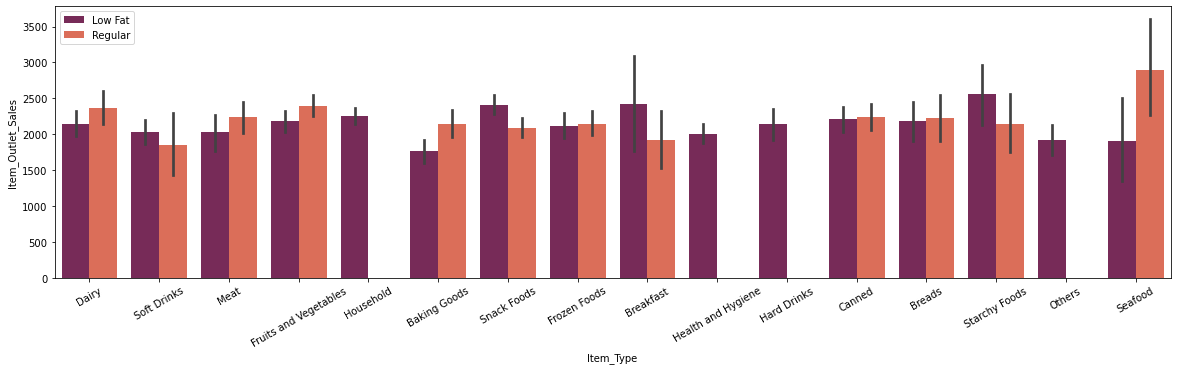

In [52]:
plt.figure(figsize=(20,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='rocket')
plt.legend()
X = plt.gca().xaxis
for item in X.get_ticklabels():
    item.set_rotation(30)

We can see that Low fat sales are high for Starchy Foods and Breakfast as these are more fat rich foods, indicating towards the changing trends of healthy eating. Seafood is regular fat consumable as people tend to eat it casually and not routinely which makes it prone to be eaten properly with all its nutrients including fat.

Now we can label encode our categorical column for model making.

In [53]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Established_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier']

for i in cols:
    train[i] = encoder.fit_transform(train[i])
    
for i in cols:
    test[i] = encoder.fit_transform(test[i])

In [58]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Established_years
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,22
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,12
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,22
3,FDX07,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,23
4,NCD19,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,34
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,19
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,17
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,12


In [59]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Established_years
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,22
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1,14
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0,23
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1,14
4,FDY38,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1,24
5677,FDD47,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2,12
5678,NCO17,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1,19
5679,FDJ26,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1,14


Lets check the correlation once again so we can drop few columns which might not be impacting target column like Item_Identifier.

<AxesSubplot:>

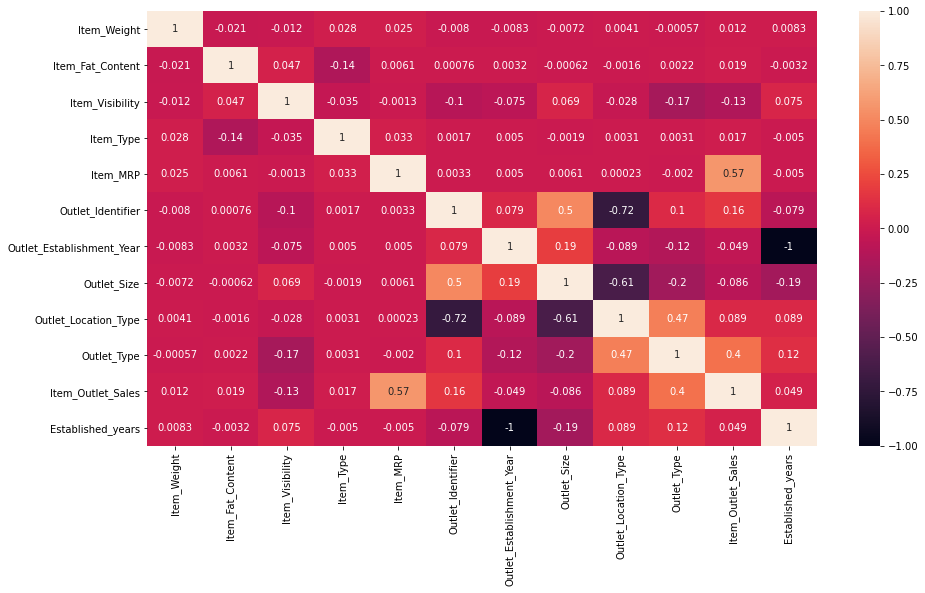

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

We can drop Item_Identifier and Outelet establishment year features as its significance has already been captured by eastablished year and Item_Identifier is different for each product, so we can drop this. 

In [62]:
train = train.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)

In [63]:
train.shape, test.shape

((8523, 11), (5681, 10))

In [65]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Established_years']]
y= train['Item_Outlet_Sales']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model 1: Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr= lr.predict(X_test)

In [74]:
lrr2 = r2_score(y_test,pred_lr)

for k in range(2,10):
    lsscore=cross_val_score(lr,X,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lrr2*100)
    print("\n")

At cv=  2
Cross Val score :  50.874577519799125
r2 score is :  52.47484654515326


At cv=  3
Cross Val score :  50.86349947618823
r2 score is :  52.47484654515326


At cv=  4
Cross Val score :  50.70733600480415
r2 score is :  52.47484654515326


At cv=  5
Cross Val score :  50.81954032846219
r2 score is :  52.47484654515326


At cv=  6
Cross Val score :  50.81098354570227
r2 score is :  52.47484654515326


At cv=  7
Cross Val score :  50.86481382005411
r2 score is :  52.47484654515326


At cv=  8
Cross Val score :  50.78313712082
r2 score is :  52.47484654515326


At cv=  9
Cross Val score :  50.81398447754627
r2 score is :  52.47484654515326




In [76]:
lsscore_selected = cross_val_score(lr,X,y,cv = 2).mean()
print("The cv score is: ", lsscore_selected, "\nThe r2 score is: ",lrr2)

The cv score is:  0.5087457751979912 
The r2 score is:  0.5247484654515326


<AxesSubplot:>

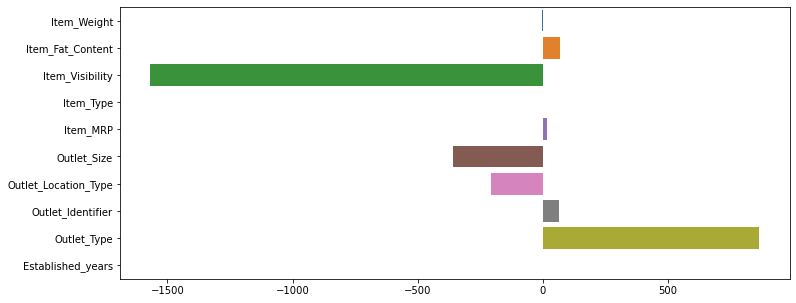

In [101]:
plt.figure(figsize=(12,5))
sns.barplot(lr.coef_,['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Established_years']
)

# Model 2: Ridge Regression

In [93]:
rid_reg_params = {"alpha":[2,4],"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],"random_state" :[25,50,75,100]}
grid_rid_reg = GridSearchCV(Ridge(), rid_reg_params)
grid_rid_reg.fit(X_train, y_train)

rid_reg = grid_rid_reg.best_estimator_
print("Best Estimators for Ridge Regression: ", grid_rid_reg.best_params_)
print("------------------------------------------")
print("best r2 score: ",grid_rid_reg.best_score_)

Best Estimators for Ridge Regression:  {'alpha': 2, 'random_state': 25, 'solver': 'svd'}
------------------------------------------
best r2 score:  0.5042137086412419


In [94]:
ridge = Ridge(alpha=2,solver="svd",random_state =25)
ridge.fit(X_train, y_train)
pred_ridge= ridge.predict(X_test)

In [96]:
ridr2 = r2_score(y_test,pred_ridge)

for k in range(2,10):
    ridscore=cross_val_score(ridge,X,y,cv=k)
    ridcv=ridscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",ridcv*100)
    print("r2 score is : ",ridr2*100)
    print("\n")

At cv=  2
Cross Val score :  50.875243901094755
r2 score is :  52.498492432802465


At cv=  3
Cross Val score :  50.863951474345015
r2 score is :  52.498492432802465


At cv=  4
Cross Val score :  50.70726674143518
r2 score is :  52.498492432802465


At cv=  5
Cross Val score :  50.81980090983645
r2 score is :  52.498492432802465


At cv=  6
Cross Val score :  50.810828644179104
r2 score is :  52.498492432802465


At cv=  7
Cross Val score :  50.86435781637094
r2 score is :  52.498492432802465


At cv=  8
Cross Val score :  50.7827405107121
r2 score is :  52.498492432802465


At cv=  9
Cross Val score :  50.813622370377665
r2 score is :  52.498492432802465




In [97]:
ridscore_selected = cross_val_score(ridge,X,y,cv = 2).mean()
print("The cv score is: ", ridscore_selected, "\nThe r2 score is: ",ridr2)

The cv score is:  0.5087524390109476 
The r2 score is:  0.5249849243280247


<AxesSubplot:>

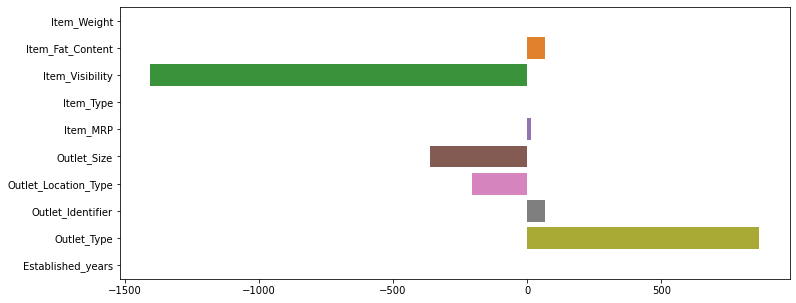

In [103]:
plt.figure(figsize=(12,5))
sns.barplot(ridge.coef_,['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Established_years'])


Marginally better than Linear Regression

# Model 3: Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_params = {"criterion": ["squared_error", "friedman_mse" , "poisson"],
              "min_samples_split": [10, 20, 40, 60],
              "max_depth": [2, 6, 7, 10],
              "min_samples_leaf": [20, 40, 100, 150],
              "max_leaf_nodes": [5, 20, 100],
              "random_state" : [10,20,100]
                }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(X_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("------------------------------------------")
print("best r2 score: ",grid_dt_reg.best_score_)

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 10, 'random_state': 10}
------------------------------------------
best r2 score:  0.585934925416437


In [106]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 6, max_leaf_nodes= 100, min_samples_leaf= 40, min_samples_split= 10,random_state=10)
dtr.fit(X_train, y_train)
pred_dtr= dtr.predict(X_test)

In [107]:
dtrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,X,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  59.182748430461295
r2 score is :  61.43119965833874


At cv=  3
Cross Val score :  59.24783621732851
r2 score is :  61.43119965833874


At cv=  4
Cross Val score :  59.36336938796904
r2 score is :  61.43119965833874


At cv=  5
Cross Val score :  59.23941625528356
r2 score is :  61.43119965833874


At cv=  6
Cross Val score :  59.40357814884777
r2 score is :  61.43119965833874


At cv=  7
Cross Val score :  59.168949732869095
r2 score is :  61.43119965833874


At cv=  8
Cross Val score :  59.31264229009784
r2 score is :  61.43119965833874


At cv=  9
Cross Val score :  59.28365377680228
r2 score is :  61.43119965833874




At cv = 6 , The cross validation is 59.4% ; 
The r2 score is 61.4%

<AxesSubplot:>

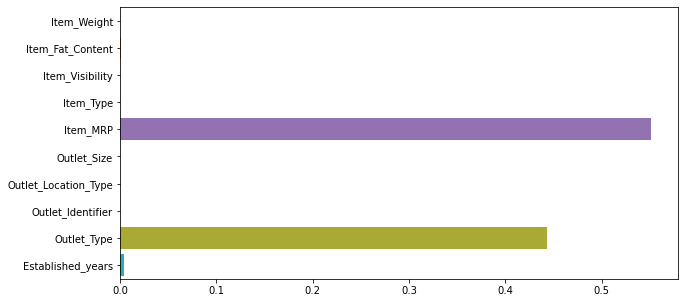

In [142]:
plt.figure(figsize=(10,5))
sns.barplot(dtr.feature_importances_,['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Established_years'])


# Model 4: Random Forest Regressor

In [111]:
rf_reg_params =  { 'max_depth': [5,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150,200]}
grid_rf_reg = GridSearchCV(RandomForestRegressor(), rf_reg_params)

grid_rf_reg.fit(X_train, y_train)

rf_reg = grid_rf_reg.best_estimator_
print(rf_reg)
print("Best Estimators for Random Forest Regression: ", grid_rf_reg.best_params_)
print("------------------------------------------")
print("best r2 score: ",grid_rf_reg.best_score_)

RandomForestRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      n_estimators=150)
Best Estimators for Random Forest Regression:  {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
------------------------------------------
best r2 score:  0.24114528150224085


In [135]:
rf = RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22)
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)

In [136]:
rfr2 = r2_score(y_test,pred_rf)

for k in range(2,10):
    rfscore=cross_val_score(rf,X,y,cv=k)
    rfcv=rfscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfcv*100)
    print("r2 score is : ",rfr2*100)
    print("\n")

At cv=  2
Cross Val score :  58.48679075764394
r2 score is :  61.907124017406076


At cv=  3
Cross Val score :  58.9699404906213
r2 score is :  61.907124017406076


At cv=  4
Cross Val score :  59.20439257465188
r2 score is :  61.907124017406076


At cv=  5
Cross Val score :  59.211801095198254
r2 score is :  61.907124017406076


At cv=  6
Cross Val score :  59.42154121775006
r2 score is :  61.907124017406076


At cv=  7
Cross Val score :  59.39755054260435
r2 score is :  61.907124017406076


At cv=  8
Cross Val score :  59.444428203092826
r2 score is :  61.907124017406076


At cv=  9
Cross Val score :  59.41980695638617
r2 score is :  61.907124017406076




At cv=  8
Cross Val score :  59.444428203092826 -----
r2 score is :  61.907124017406076

<AxesSubplot:>

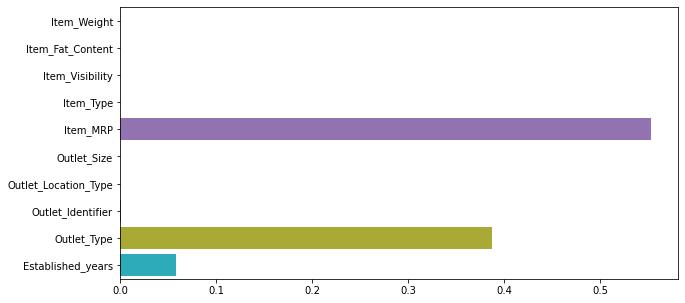

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(rf.feature_importances_,['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Identifier','Outlet_Type','Established_years'])


# Saving the model

In [137]:
import pickle
filename = "Bigmart_Sales_pred.pkl"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

Item_MRP is the major impact causing feature on the Sales target column. Outlet_Type definitely also conveys an important piece regarding bigger markets(supermarket type I) equals bigger sales. Established_years have a lesser impact but it also informs us about longer years of establishment had little better saler than younger stores.

In [138]:
h = np.array(y_test)
predicted = np.array(pred_rf)
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))
df_comp

,original,predicted
0,1743.0644,1388.958748
1,356.8688,736.407591
2,377.5086,715.957211
3,5778.4782,4522.481088
4,2356.9320,3120.361061
...,...,...
1700,3004.0896,2085.152991
1701,890.8404,2420.552804
1702,629.1810,720.668811
1703,253.0040,708.513092


In [139]:
print("the r2 score: ",r2_score(y_test,pred_rf))

the r2 score:  0.6190712401740608
